<a href="https://colab.research.google.com/github/vbaezfortunato/Python_class/blob/master/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K means and anomaly detection**

A continuación se presentan los siguientes ejercicios para la maestría de Data Science, en la asignatura de Statistical learning II:

Utilizar el dataset con la estatura y edad de los estudiantes de la mestría y realizar un modelo de:

Hard-Clustering con k-means
Soft-Clustering con GMM usando sklearn
Ejecutar 5 experimentos para seleccionar el valor de "k":

Ambos de métodos pueden usar el mismo valor de "k"
Analizar el centroide de cada cluster y determinar si es posible asignar una categoría a cada cluster.
Analizar y concluir si el método del codo es adecuado para este problema.

Usar los datos en la seguna pestaña del archivo de excel en el que se encuentra el dataset y estimar:

El cluster que k-means asigna a cada uno.
La probabilidad de pertenecer a cada cluster según GMM.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
xlsx = pd.ExcelFile('/content/gdrive/My Drive/estaturas.xlsx')
dt = pd.read_excel(xlsx,'normales')
df1 = pd.read_excel(xlsx, 'valtest(normales)')
df2 = pd.read_excel(xlsx, 'anomalias')

In [ ]:
df2

,Estatura,Edad
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


In [ ]:

dt.describe()

,Estatura(metros),Edad(años)
count,29.000000,29.000000
mean,1.734483,28.310345
std,0.078175,4.683584
min,1.550000,21.000000
25%,1.680000,25.000000
50%,1.750000,27.000000
75%,1.790000,32.000000
max,1.850000,40.000000


**Histograma de Edad**

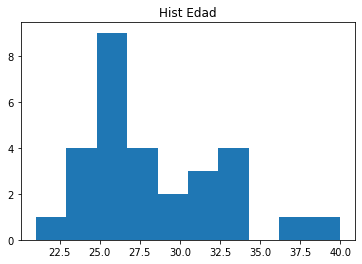

In [ ]:

plt.hist(dt['Edad(años)'])
plt.title("Hist Edad")
plt.show()

**Histograma de Estaturas**

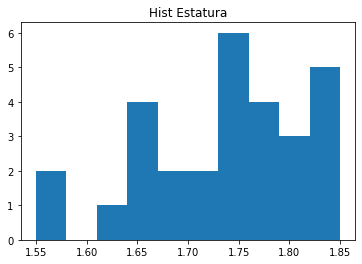

In [ ]:
plt.hist(dt['Estatura(metros)'])
plt.title("Hist Estatura")
plt.show()

**Scatter Plot**

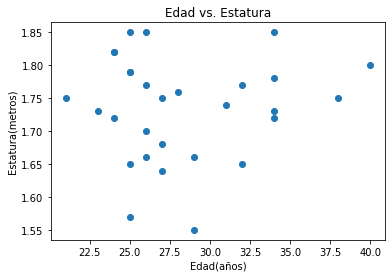

In [ ]:

plt.scatter(dt['Edad(años)'], dt['Estatura(metros)'])
plt.title("Edad vs. Estatura")
plt.xlabel("Edad(años)")
plt.ylabel("Estatura(metros)")
plt.show()

**Variables Definition**

In [ ]:
dt.iloc[:,:2].values

array([[ 1.77, 26.  ],
       [ 1.74, 31.  ],
       [ 1.72, 24.  ],
       [ 1.78, 34.  ],
       [ 1.65, 32.  ],
       [ 1.66, 29.  ],
       [ 1.64, 27.  ],
       [ 1.85, 34.  ],
       [ 1.85, 26.  ],
       [ 1.75, 21.  ],
       [ 1.73, 23.  ],
       [ 1.79, 25.  ],
       [ 1.82, 24.  ],
       [ 1.65, 25.  ],
       [ 1.79, 25.  ],
       [ 1.72, 34.  ],
       [ 1.7 , 26.  ],
       [ 1.57, 25.  ],
       [ 1.66, 26.  ],
       [ 1.75, 27.  ],
       [ 1.77, 32.  ],
       [ 1.8 , 40.  ],
       [ 1.85, 25.  ],
       [ 1.82, 24.  ],
       [ 1.75, 38.  ],
       [ 1.73, 34.  ],
       [ 1.55, 29.  ],
       [ 1.76, 28.  ],
       [ 1.68, 27.  ]])

In [ ]:
df = np.array(dt)
df[:,1]

array([26., 31., 24., 34., 32., 29., 27., 34., 26., 21., 23., 25., 24.,
       25., 25., 34., 26., 25., 26., 27., 32., 40., 25., 24., 38., 34.,
       29., 28., 27.])

**Arma kmean process**

In [ ]:
randon_e = np.random.uniform(np.min(dt['Edad(años)']), np.max(dt['Edad(años)']), 3).reshape(-1,1)
randon_e

array([[23.37835755],
       [38.66946463],
       [30.73395811]])

In [ ]:
randon_es = np.random.uniform(np.min(dt['Estatura(metros)']), np.max(dt['Estatura(metros)']), 3).reshape(-1,1)
randon_es

array([[1.69095235],
       [1.58052567],
       [1.83472205]])

In [ ]:
centroids = np.concatenate((randon_e, randon_es), axis = 1)
centroids

array([[23.37835755,  1.69095235],
       [38.66946463,  1.58052567],
       [30.73395811,  1.83472205]])

In [ ]:
output = list()

for i in range(0,3):
    out = np.sqrt(np.sum(np.square(np.subtract(df,centroids[i])), axis = 1))
    output.append(out)

In [ ]:
np.array(output).T

array([[32.52462012, 44.24795156, 37.72096934],
       [36.43128864, 47.21536644, 41.12496863],
       [31.09305484, 43.21915971, 36.5117695 ],
       [38.86339678, 49.11063955, 43.2774398 ],
       [37.29289331, 47.91435255, 41.90251321],
       [34.89227907, 46.06004825, 39.79004104],
       [33.3632145 , 44.91470724, 38.46751373],
       [38.82453785, 49.0580808 , 43.23063892],
       [32.47152563, 44.18125963, 37.6595764 ],
       [28.99353672, 41.71525923, 34.747341  ],
       [30.37642007, 42.70032703, 35.90541153],
       [31.77056632, 43.68714559, 37.07266936],
       [31.02348123, 43.13369765, 36.4323554 ],
       [31.86586299, 43.80539396, 37.18207528],
       [31.77056632, 43.68714559, 37.07266936],
       [38.8967738 , 49.15572452, 43.31760463],
       [32.57116798, 44.30634314, 37.77474529],
       [31.92046619, 43.87302194, 37.24468493],
       [32.59780441, 44.33972484, 37.80549826],
       [33.29164675, 44.82406211, 38.38438539],
       [37.22310419, 47.82169914, 41.819

In [ ]:
np.array(centroids[:, np.newaxis]).T

array([[[23.37835755, 38.66946463, 30.73395811]],

       [[ 1.69095235,  1.58052567,  1.83472205]]])

In [ ]:
clusters = np.argmin(np.array(output).T, axis = 1)

In [ ]:
out = np.empty_like(centroids)
for i in range(0,3):
    out[i] = np.mean(df[clusters == i],axis = 0)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [ ]:
df[:, 0], df[:, 1] = df[:, 1], df[:, 0].copy()

In [ ]:
# inicialización de centroides random dentro de parámetros

class KMeans:
    
    def __init__(self,df,k, verbosity):
        self.verbosity = verbosity
        self.df = df
        self.k = k
        self.randon_e = np.random.uniform(np.min(df[:,0]), np.max(df[:,0]), self.k).reshape(-1,1)
        self.randon_es = np.random.uniform(np.min(df[:,1]), np.max(df[:,1]), self.k).reshape(-1,1)
        self.centroids = np.concatenate((self.randon_e, self.randon_es), axis = 1)
        self.clusters = np.empty_like(df[:,0])
        self.min_distances = np.empty_like(df[:,0])
        self.error = 0 
        
    def Clusters(self):
        output = list()
        for i in range(0,self.k):
            out = np.sqrt(np.sum(np.square(np.subtract(self.df,self.centroids[i])), axis = 1))
            output.append(out)
        distances = np.array(output).T
        self.min_distances = np.min(distances, axis = 1)
        self.clusters = np.argmin(distances, axis = 1)
        
    def UpdateCentroids(self):
        self.Clusters()
        output_centroids = np.empty_like(self.centroids)
        for i in range(0,self.k):
            output_centroids[i] = np.mean(self.df[self.clusters == i],axis = 0)
        return output_centroids
                 
    def Fit(self):
        last_centroids = np.zeros_like(self.centroids)
        while not (last_centroids == self.UpdateCentroids()).all():
            last_centroids = self.UpdateCentroids()
            self.centroids = last_centroids
            if self.verbosity == True:
                print('centroides:')
                print(last_centroids)
                print("****************************************************************************************")
        self.error = np.mean(self.min_distances)
       

    def Predict(self, test):
        output = list()
        for i in range(0, self.k):
            out = np.sqrt(np.sum(np.square(np.subtract(test, self.centroids[i])), axis = 1))
            output.append(out)
        distances = np.array(output).T
        # min_distances = np.min(distances, axis = 1)
        clusters = np.argmin(distances, axis = 1)
        return clusters
                    

In [ ]:
K= KMeans(df,3, True)

In [ ]:
K.Fit()

centroides:
[[25.22222222  1.73888889]
 [30.6         1.674     ]
 [35.66666667  1.77166667]]
****************************************************************************************
centroides:
[[25.05882353  1.73764706]
 [30.16666667  1.68833333]
 [35.66666667  1.77166667]]
****************************************************************************************


In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components = 5)

gm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
gm.predict(df)

array([3, 4, 3, 0, 4, 4, 1, 0, 3, 3, 3, 3, 3, 1, 3, 0, 1, 1, 1, 1, 4, 2,
       3, 3, 2, 0, 4, 1, 1])

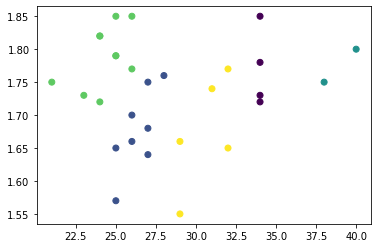

In [ ]:

plt.scatter(df[:,0], df[:,1], c = gm.predict(df))
plt.show()

In [ ]:
gm.predict_proba(df)

array([[0.00000000e+000, 9.22360678e-002, 0.00000000e+000,
        9.07763832e-001, 1.00551352e-007],
       [0.00000000e+000, 2.76421377e-007, 0.00000000e+000,
        2.37524489e-008, 9.99999700e-001],
       [0.00000000e+000, 3.73604315e-004, 0.00000000e+000,
        9.99626396e-001, 3.52970714e-011],
       [9.99965370e-001, 4.91810899e-023, 0.00000000e+000,
        3.51973451e-017, 3.46295769e-005],
       [0.00000000e+000, 1.90565122e-016, 0.00000000e+000,
        6.54733307e-016, 1.00000000e+000],
       [0.00000000e+000, 1.27577285e-003, 0.00000000e+000,
        3.03482940e-008, 9.98724197e-001],
       [0.00000000e+000, 9.90371400e-001, 0.00000000e+000,
        2.65583421e-006, 9.62594445e-003],
       [9.99914947e-001, 6.43562979e-019, 0.00000000e+000,
        4.60480112e-014, 8.50530707e-005],
       [0.00000000e+000, 4.14242304e-005, 0.00000000e+000,
        9.99958576e-001, 5.19139749e-011],
       [0.00000000e+000, 2.09985313e-018, 0.00000000e+000,
        1.00000000e+000

In [ ]:

model_list = list()
for i in range(1,6):
    print(i)
    model = KMeans(df, k = i, verbosity = False)
    model_list.append(model)

1
2
3
4
5


In [ ]:
error_list = list()
for i in model_list:
    i.Fit()
    error = i.error
    error_list.append(error)

In [ ]:
    error_list

[3.835293925750108,
 1.681819029148096,
 1.382701033164735,
 0.9842847092363377,
 0.8405144741655243]

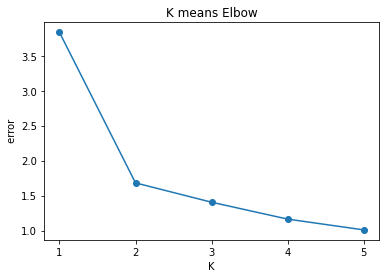

In [ ]:
plt.plot(np.array([1,2,3,4,5], dtype = np.int32), error_list)
plt.scatter(np.array([1,2,3,4,5], dtype = np.int32), error_list)
plt.title("K means Elbow")
plt.xlabel("K")
plt.ylabel(" error")
plt.xticks([1,2,3,4,5])
plt.show()

Se decidirá utiliza un  𝑘=1  por presentar el último punto antes del Elbow.

In [ ]:
model_K = model_list[2]

In [ ]:
model_K.clusters

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 2, 0, 1, 1, 1])

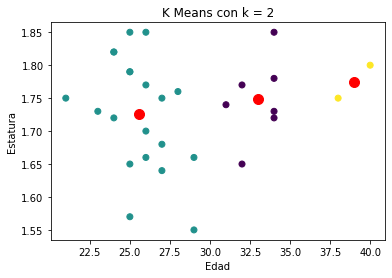

In [ ]:
plt.scatter(df[:,0], df[:,1], c=model_K.clusters)
plt.scatter(model_K.centroids[:,0], model_K.centroids[:,1], color = "red", s = 100)
plt.title("K Means con k = 2")
plt.xlabel("Edad")
plt.ylabel("Estatura")
plt.show()

In [ ]:
gmk = GaussianMixture(n_components=1)
gmk.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

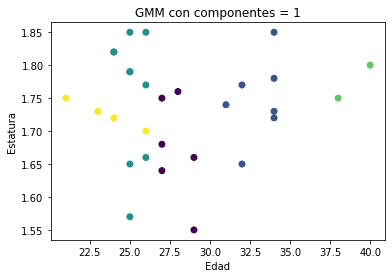

In [ ]:
plt.scatter(df[:,0], df[:,1], c=gmm.predict(df))
plt.title("GMM con componentes = 1")
plt.xlabel("Edad")
plt.ylabel("Estatura")
plt.show()

**Análisis de clusters**
Parecen haber 4 clusters principales en este dataset, y  dependen principalmente de la edad. Parece haber agrupaciones principalmente de personas menores de aproximadamente 25 años, de 25 a 29 años, de 32 a 37 años, y los mayores de 37 años.

**Testing**

In [ ]:
test = np.array(df1)

In [ ]:
gm.predict(test)

array([4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
model_K.Predict(test)

array([1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Switch de columnas
test[:, 0], test[:, 1] = test[:, 1], test[:, 0].copy()

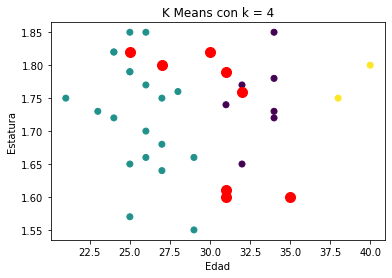

In [ ]:
plt.scatter(df[:,0], df[:,1], c=model_K.clusters)
plt.scatter(test[:,0], test[:,1], color = "red", s = 100)
plt.title("K Means con k = 4")
plt.xlabel("Edad")
plt.ylabel("Estatura")
plt.show()

# **Decteccion de Anormalias**

In [ ]:
from scipy.stats import multivariate_normal as mn

In [ ]:
x_anomalias = df2.values

In [ ]:
# Switch de columnas
df[:, 0], df[:, 1] = df[:, 1], df[:, 0].copy()

In [ ]:
x_anomalias

array([[2.500e-01, 2.400e+00],
       [1.751e+02, 2.500e+00],
       [1.500e-01, 2.500e+02],
       [1.500e+02, 1.401e+01]])

In [ ]:

y_anomalias = np.array ([[1],
                         [1],
                         [1],
                         [1],])

# **Calculando la Media y la Varianza**

In [ ]:
medias = np.mean(df, axis=1)

In [ ]:
medias

array([13.885, 16.37 , 12.86 , 17.89 , 16.825, 15.33 , 14.32 , 17.925,
       13.925, 11.375, 12.365, 13.395, 12.91 , 13.325, 13.395, 17.86 ,
       13.85 , 13.285, 13.83 , 14.375, 16.885, 20.9  , 13.425, 12.91 ,
       19.875, 17.865, 15.275, 14.88 , 14.34 ])

In [ ]:
varianza = np.var(df, axis=0)

In [ ]:
varianza 

array([5.90059453e-03, 2.11795482e+01])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
 rv = mn(mean = medias, cov = varianza)


In [ ]:
p < 1

array([ True,  True, False,  True])

In [ ]:
def clasificacion(x,media,varianza,epsilon,y):
    
    prob  = (mn.pdf(x[:,0],medias[0],varianza[0]))**(mn.pdf(x[:,1],medias[1],varianza[1]))
                         
    ## evaluando la condicional 
    condicional = (prob < epsilon)
    
   
    F1_Validation = f1_score(y, condicional)
    
  
    cadena_config = "Clasificaciòn con""_Epsilon="+str(epsilon)
    
    print("f1score",F1_Validation*100, "%")
    print("Anomalo = 1:",condicional*1)
    
    return cadena_config, F1_Validation

Se puede comparar que cuando se tienen anomalias estas tienen una pdf muy baja por la tanto se quiere establecer un parametro para discriminar estas anomalias

In [ ]:

clasificacion(x_anomalias,medias,varianza,0.10,y_anomalias)

f1score 85.71428571428571 %
Anomalo = 1: [1 1 0 1]


('Clasificaciòn con_Epsilon=0.1', 0.8571428571428571)

In [ ]:
clasificacion(x_anomalias,medias,varianza,0.001,y_anomalias)

f1score 85.71428571428571 %
Anomalo = 1: [1 1 0 1]


('Clasificaciòn con_Epsilon=0.001', 0.8571428571428571)

In [ ]:
clasificacion(x_anomalias,medias,varianza,0.025,y_anomalias)

f1score 85.71428571428571 %
Anomalo = 1: [1 1 0 1]


('Clasificaciòn con_Epsilon=0.025', 0.8571428571428571)

In [ ]:
clasificacion(x_anomalias,medias,varianza,0.000000000000000000000000000000000000000000001,y_anomalias)

f1score 85.71428571428571 %
Anomalo = 1: [1 1 0 1]


('Clasificaciòn con_Epsilon=1e-45', 0.8571428571428571)

In [ ]:
mn.pdf(x_anomalias[:,0],medias[0],varianza[0])

array([0., 0., 0., 0.])

In [ ]:
mn.pdf(x_anomalias[:,1],medias[1],varianza[1])

array([0.00086502, 0.00092379, 0.        , 0.07600609])

# Decteccion de Anormalia Funcion

In [ ]:
def anomalia(x1,x2):
    ## probablididad conjunta
    prob  = (mn.pdf(x1,medias[0],varianza[0]))**(mn.pdf(x2,medias[1],varianza[1]))
                                               
    ## evaluando la condicional para epsilon
    if prob < 0.000000000000000000000000000000000000000000001:
        print("Anomalo")
    elif prob >= 0.000000000000000000000000000000000000000000001:
        print("No Anomalo")

In [ ]:
anomalia(1,34)

Anomalo


In [ ]:
anomalia(12,25)

No Anomalo
